# Phylogenetic networks

*Implementing the phylogenetic network class.  *

## Import libraries and PhylogeneticNetwork class

In [1]:
import importlib
import string

import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

import matplotlib.pyplot as plt

import models
from models import PhylogeneticNetwork

importlib.reload(models)

<module 'models' from '/Users/meesvdent/Developer/phylogenetic_networks/models.py'>

## Input

Creating two matrices with two dimensions.  
  
**Rows** represent different species, all rows must be unique.  
**Columns** represent different "features" this can be interpreted as animal features or changes in genomes.

First set (sequences) should give rise to a linear tree, where sequences_2 should give rise to a branched tree and sequences_3 has a missing link.

In [2]:
import numpy as np

sequences = [
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
]


sequences_2 = [
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
]

sequences_3 = [
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0], 
    [0, 1, 1, 1, 0],
    [0, 1, 1, 0, 1]
]

species = list(string.ascii_lowercase[0:len(sequences)]) #  Names of species
features = list(range(len(sequences[0]))) #  Names of features

species_2 = list(string.ascii_lowercase[0:len(sequences_2)])
features_2 = list(range(len(sequences_2[0])))

species_3 = list(string.ascii_lowercase[0:len(sequences_3)]) #  Names of species
features_3 = list(range(len(sequences_3[0]))) #  Names of features


## Create class object and calculate hierarchy

In [3]:
n = PhylogeneticNetwork(sequences=sequences, species=species, features=features)
n.find_hierarchy()

p = PhylogeneticNetwork(sequences=sequences_2, species=species_2, features=features_2)
p.find_hierarchy()

o = PhylogeneticNetwork(sequences=sequences_3, species=species_3, features=features_3)
o.find_hierarchy()

## Testing result

In [4]:
print(n.name)
print(n.children[0].name)
print(n.children[0].children[0].name)
print(n.children[0].children[0].children[0].name)
print(n.children[0].children[0].children[0].children[0].name)


print(n.children)
print(p.children)

print(n.connections)
print(p.connections)

a
b
c
d
e
[<models.Node object at 0x1123588b0>, <models.Node object at 0x112358d90>]
[('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e')]
[('c', 'd'), ('c', 'b'), ('b', 'a'), ('b', 'e'), ('e', 'f'), ('f', 'g')]


## Visualizing trees

Using networkx to visualize graphs.

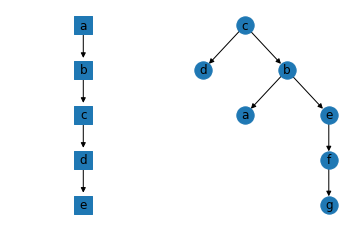

<function matplotlib.pyplot.show(*args, **kw)>

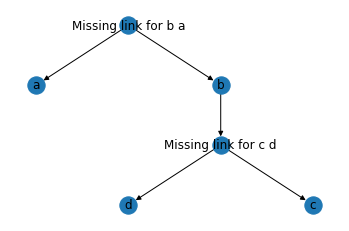

In [5]:
n_graph = nx.DiGraph()
n_graph.add_edges_from(n.connections)

p_graph = nx.DiGraph()
p_graph.add_edges_from(p.connections)

o_graph = nx.DiGraph()
o_graph.add_edges_from(o.connections)

n_pos = graphviz_layout(n_graph, prog="dot")
p_pos = graphviz_layout(p_graph, prog="dot")
o_pos = graphviz_layout(o_graph, prog="dot")

plt.subplot(121)
nx.draw(n_graph, n_pos, with_labels=True, node_shape='s')
plt.subplot(122)
nx.draw(p_graph, p_pos, with_labels=True, node_shape='s')
plt.show()
plt.subplot(111)
nx.draw(o_graph, o_pos, with_labels=True, node_shape='s')
plt.show